# Homework 2 Part 2

**This is an indiviual assignment.**

In [58]:
# Import necessary libraries and magics

import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from scipy import stats
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, rand_score
from sklearn.cluster import KMeans

# Problem 1 (17.5 points)

In this data you will working with the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine):

In [27]:
from sklearn.datasets import load_wine

wine = load_wine(return_X_y=False)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Let's load this data into a ```pandas``` dataframe:

In [28]:
import pandas as pd

df = pd.DataFrame(np.hstack((wine.target[:,np.newaxis],wine.data)), columns=['Class']+wine.feature_names)
df

,Class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Problem Set

Answer the following questions:

1. (9 points) Implement k-Means for the 13 wine features. Use the silhouette index and rand index to determine which value of $k$ best works for this data. Justify your answer.

In [100]:
Values = np.array(df.loc[:,"alcohol":])
Class = np.array(df.loc[:,"Class"])

In [94]:
np.array(df.loc[:,"alcohol":])

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [115]:
def KM(X,C):
    
    km = []
    for k in range(2,11):
        x = KMeans(n_clusters=k, random_state = 0).fit(X)
        km.append(x.labels_)
    S_score = [silhouette_score(X,km[i],metric ="euclidean")for i in range(len(km))]
        
    k = list(range(2,11))
    plt.plot(k,S_score)
    R_score = [rand_score(C,km[i]) for i in range(len(km))]
        
    plt.plot(k,R_score)
    return S_score, R_score

highest value of Silhoutt_score and rand_score combines
[0.66356934 0.64489748 0.63113996 0.63274888 0.63764196 0.62877529
 0.61492594 0.61104198 0.60184998]


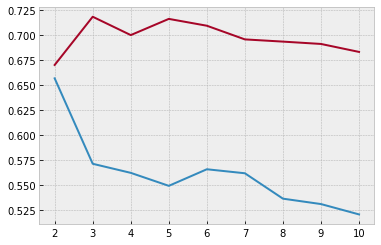

In [116]:
a,b = KM(Values,Class)
print("highest value of Silhoutt_score and rand_score combines")
c = np.zeros(len(a))
for i in range(len(a)):
    c[i] = (a[i]+b[i])/2
print(c)
    

Although the highest value for both Silhoutt_score and rand_score cobined is at 2 but most of the time we shoulf ignore the first value cause  Silhoutt_score is usually highest at 2. So we take the highest value after 2 which is 3 thus we take k = 3.

2. (8.5 points) For the *optimal* value of $k$ found in the previous question, predict the clustering labels. Compute the silhouette index and the rand index for the predicted labels.

In [117]:
x = KMeans(n_clusters = 3, random_state = 0).fit(Al)
b = x.labels_
print(b)
Ss = silhouette_score(Al, b, metric='euclidean')
print(Ss)
Rs = rand_score(Cl,b)
print(Rs)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]
0.5711381937868838
0.718656763791024


---

# Problem 2 (15 points)

The starter code below is an incomplete implementation of the EM algorithm to optimize a Gaussian Mixture Model data likelihood.

In this problem, you will complete the provided code by filling in the empty slots (do not use any library or online implementations).

In [29]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def EM_GaussianMixture(X, NumComponents, MaximumNumberOfIterations=100, DiffThresh=1e-4, display=False):
    '''This function implements the EM algorithm for a Gaussian Mixture Model
    
    Input:
    X - n-d array of size N-by-D (feature matrix).
    NumComponents - integer (>0). Number of Gaussian components.
    MaximumNumberOfIterations - integer (>0). Maximum number of EM steps or iterations.
    DiffThresh - float (>=0). Convergence criteria measuring difference between consecutive point estimators.
    
    Output:
    Means - n-d array of size (NumComponents)x(D). Estimated Gaussian means.
    Sigs - n-d array of size (D)x(D)x(NumComponents). Estimated covariance matrices.
    Ps - n-d array of size (NumComponents)x1. Estimated probability contribution for each mixture (pis).
    pZ_X - n-darray of size (N)x(NumComponents). Estimated membership probabilities for each data point in each component, P(zi|xi).'''
    
    # Size of the input data: N number of points, D features
    N, D = X.shape
    
    # Initialize Parameters of each Component K
    Means = np.zeros((NumComponents,D))
    Sigs = np.zeros(((D, D, NumComponents)))
    Ps = np.zeros(NumComponents)
    for i in range(NumComponents):
        rVal = np.random.uniform(0,1)
        Means[i,:] = X[max(1,round(N*rVal)),:]
        Sigs[:,:,i] = 1*np.eye(D)
        Ps[i] = 1/NumComponents
    Sum = 0;
    # E-Step Solve for p(z | x, Theta(t)) = Cik
    pZ_X = np.zeros((N,NumComponents))
    for k in range(NumComponents):
        # Assign each point to a (multivariate) Gaussian component with probability pi(k)
        pZ_X[:,k] = stats.multivariate_normal.pdf(X, mean = Means[k,:],cov = Sigs[:,:,k] )*Ps[k]  # COMPLETE THIS LINE
           
    pZ_X = pZ_X / pZ_X.sum(axis=1)[:, np.newaxis]
    print(pZ_X)
    Diff = np.inf
    NumberIterations = 1
    while Diff > DiffThresh and NumberIterations < MaximumNumberOfIterations:
        ## M-step: Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumComponents):
            ## Complete M-step: Update parameters
            #Means
            Means[k,:] = np.sum(X * pZ_X[:, k, np.newaxis], axis=0) /sum(pZ_X[:,k]) # COMPLETE THIS LINE
            
            #Sigs
            xDiff = X-MeansOld[k,:]            
            J = np.zeros((D,D))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:], xDiff[i,:])
            Sigs[:,:,k] = J / sum(pZ_X[:,k])

            #Ps
            Ps[k] = sum(pZ_X[:,k])/N # COMPLETE THIS LINE

        ## E-step: Solve for p(z | x, Theta(t))
        # Complete E-step
        for k in range(NumComponents):
            # Assign each point to a Gaussian component with probability pi(k)
            pZ_X[:,k] =  stats.multivariate_normal.pdf(X, mean = Means[k,:],cov = Sigs[:,:,k] )*Ps[k]  # COMPLETE THIS LINE
         
        pZ_X = pZ_X / pZ_X.sum(axis=1)[:, np.newaxis]
        Diff = sum(sum(abs(MeansOld - Means))) + sum(sum(sum(abs(SigsOld - Sigs)))) + sum(abs(PsOld - Ps))
        if display:
            print('t = ',NumberIterations,': \t', Diff)
        NumberIterations = NumberIterations + 1
        

    return Means, Sigs, Ps, pZ_X

---

# Problem 3 (15 points)

Using your code in problem 3, determine the mixture proportion, mean and (diagonal) covariance associated with each of the mixture component in the data contained in ```mixture.txt```.

In your solution include:

* a plot where each data point is color-coded by their weight responsabilities (you have been provided with the plotting script).

* a plot where each data point is color-coded by their cluster membership.

Answer the following questions:

1. How many mixture components are found in the data?

2. How did you determine this?

3. What did you estimate for the mixture components, means and covariances associated with each mixture component?

[[0.363346   0.10932992 0.52732408]
 [0.36116275 0.32558568 0.31325157]
 [0.32912503 0.37815289 0.29272208]
 ...
 [0.35588435 0.06134063 0.58277502]
 [0.33287093 0.04043906 0.62669001]
 [0.35027608 0.05992515 0.58979878]]
t =  1 : 	 9.714376831005207
t =  2 : 	 3.840466879569435
t =  3 : 	 0.21160858338967853
t =  4 : 	 0.1532575554761362
t =  5 : 	 0.23229278284517246
t =  6 : 	 0.4395483615871473
t =  7 : 	 0.6873306909569877
t =  8 : 	 0.7070068203015687
t =  9 : 	 0.49560298233812183
t =  10 : 	 0.3114416745024754
t =  11 : 	 0.29611621837324575
t =  12 : 	 0.41546082995065414
t =  13 : 	 0.5179583229140022
t =  14 : 	 0.5691600503409606
t =  15 : 	 0.5719818180272952
t =  16 : 	 0.5806402611274771
t =  17 : 	 0.609123791489957
t =  18 : 	 0.65328065624502
t =  19 : 	 0.7297847022795207
t =  20 : 	 0.8311804980856518
t =  21 : 	 0.842501090695333
t =  22 : 	 0.6851790602782171
t =  23 : 	 0.46285202428719996
t =  24 : 	 0.4010539358358555
t =  25 : 	 0.39700846835931447
t =  26 : 	

C:\Users\amitp\AppData\Local\Temp\ipykernel_21104\39584452.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(p1, ax=ax);


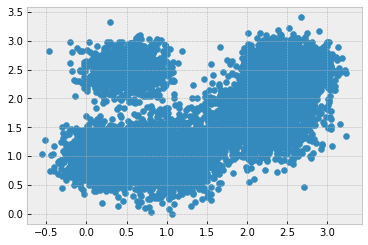

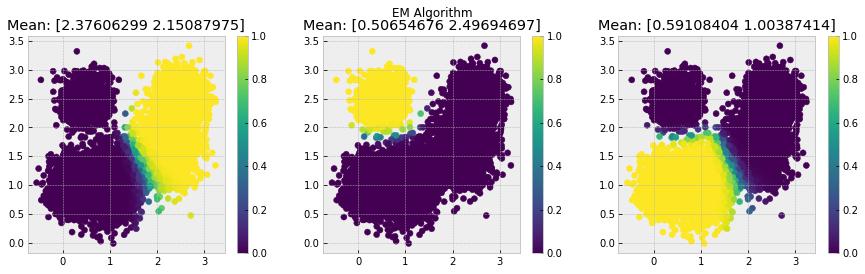

In [42]:
## Load Data
X = np.loadtxt('mixture.txt')
plt.scatter(X[:,0],X[:,1]);

## Set number of components
NumComponents = 3 # COMPLETE THIS LINE
EM_Means, EM_Sigs, EM_Ps, pZ_X = EM_GaussianMixture(X, NumComponents,50,0.1, True)

print('EM Algorithm. # Components: ' + str(NumComponents))
print('---------------------')
for i in range(NumComponents):
    print('Component '+str(i+1))
    print('Estimated Means')
    print(EM_Means[i,:])
    print('Estimated Covariances')
    print(EM_Sigs[:,:,i])
    print('Estimated Weights')
    print(EM_Ps[i])
    print('---------------------')
    
fig = plt.figure(figsize=(15, 4))
plt.suptitle('EM Algorithm')
for i in range(NumComponents):
    ax = fig.add_subplot(1,NumComponents,i+1)
    p1 = ax.scatter(X[:,0], X[:,1], c=pZ_X[:,i]) 
    ax.set_title('Mean: '+ str(EM_Means[i,:]))
    fig.colorbar(p1, ax=ax);

Ans:1 Three mixture components are found in the data.

Ans:2 I found it becuse by looking at the graph we can tell that for 3 components the points are clustered very beautifully thus from the observation of the graph we can say that for 3 components model gives the best result.

Ans 3:for Component 1:
      
      
      Estimated means:[2.37 2.15]
      Estimated Covriance:[[0.0896395  0.05363618]
                           [0.05363618 0.23077506]]
      Estumated weights:0.45028651477003706
      
      for Component 2:
      Estimated Means: [0.50654676 2.49694697]
      Estimated Covariances: [[ 0.06210782 -0.00116765]
                         [-0.00116765  0.05134698]]
      Estimated Weights: 0.1075251535681878
   
      
      for Component 3:
      Estimated Means: [0.59108404 1.00387414]
      Estimated Covariances: [[0.21738378 0.0037587 ]
                              [0.0037587  0.07291025]]
      Estimated Weights: 0.4421883316617763
      
      

___